In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: xlabel='bedrooms', ylabel='count'>

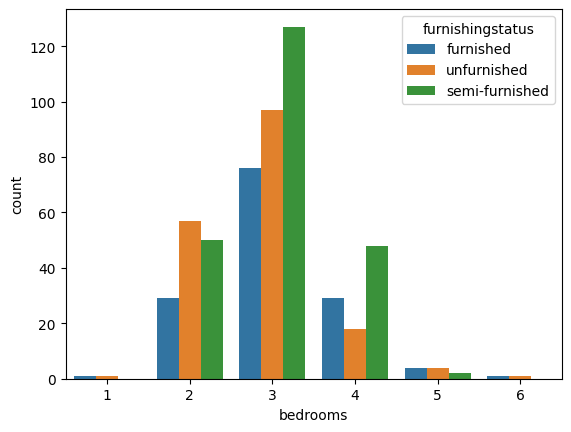

In [7]:
sns.countplot(x = "bedrooms", data = df, hue = "furnishingstatus")

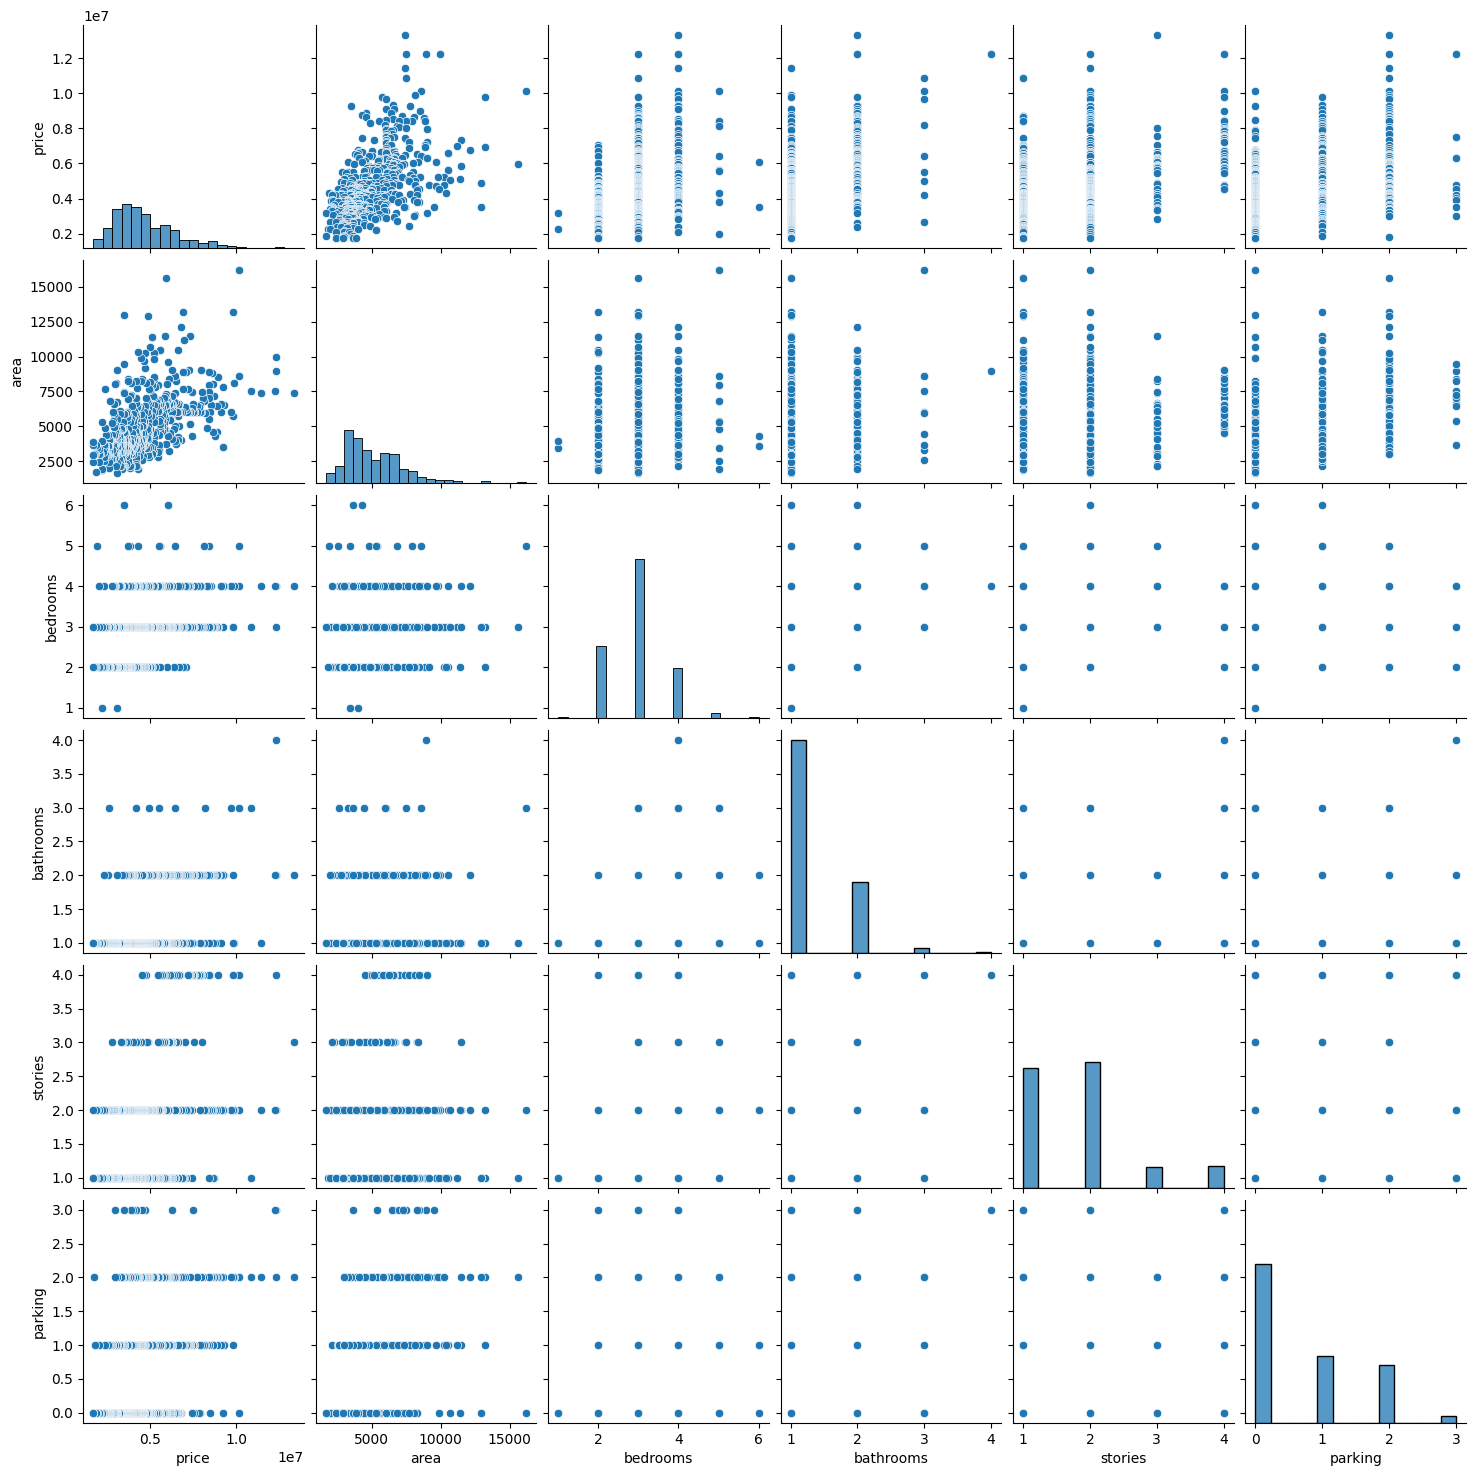

In [8]:
sns.pairplot(data = df)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df["mainroad"] = le.fit_transform(df["mainroad"])

In [12]:
df["guestroom"] = le.fit_transform(df["guestroom"])

In [13]:
df["basement"] = le.fit_transform(df["basement"])

In [14]:
df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])

In [15]:
df["airconditioning"] = le.fit_transform(df["airconditioning"])

In [16]:
df["prefarea"] = le.fit_transform(df["prefarea"])

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
oe = OrdinalEncoder(categories = [["unfurnished", "furnished", "semi-furnished"]])

In [19]:
df["furnishingstatus"] = oe.fit_transform(df[["furnishingstatus"]])

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [22]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


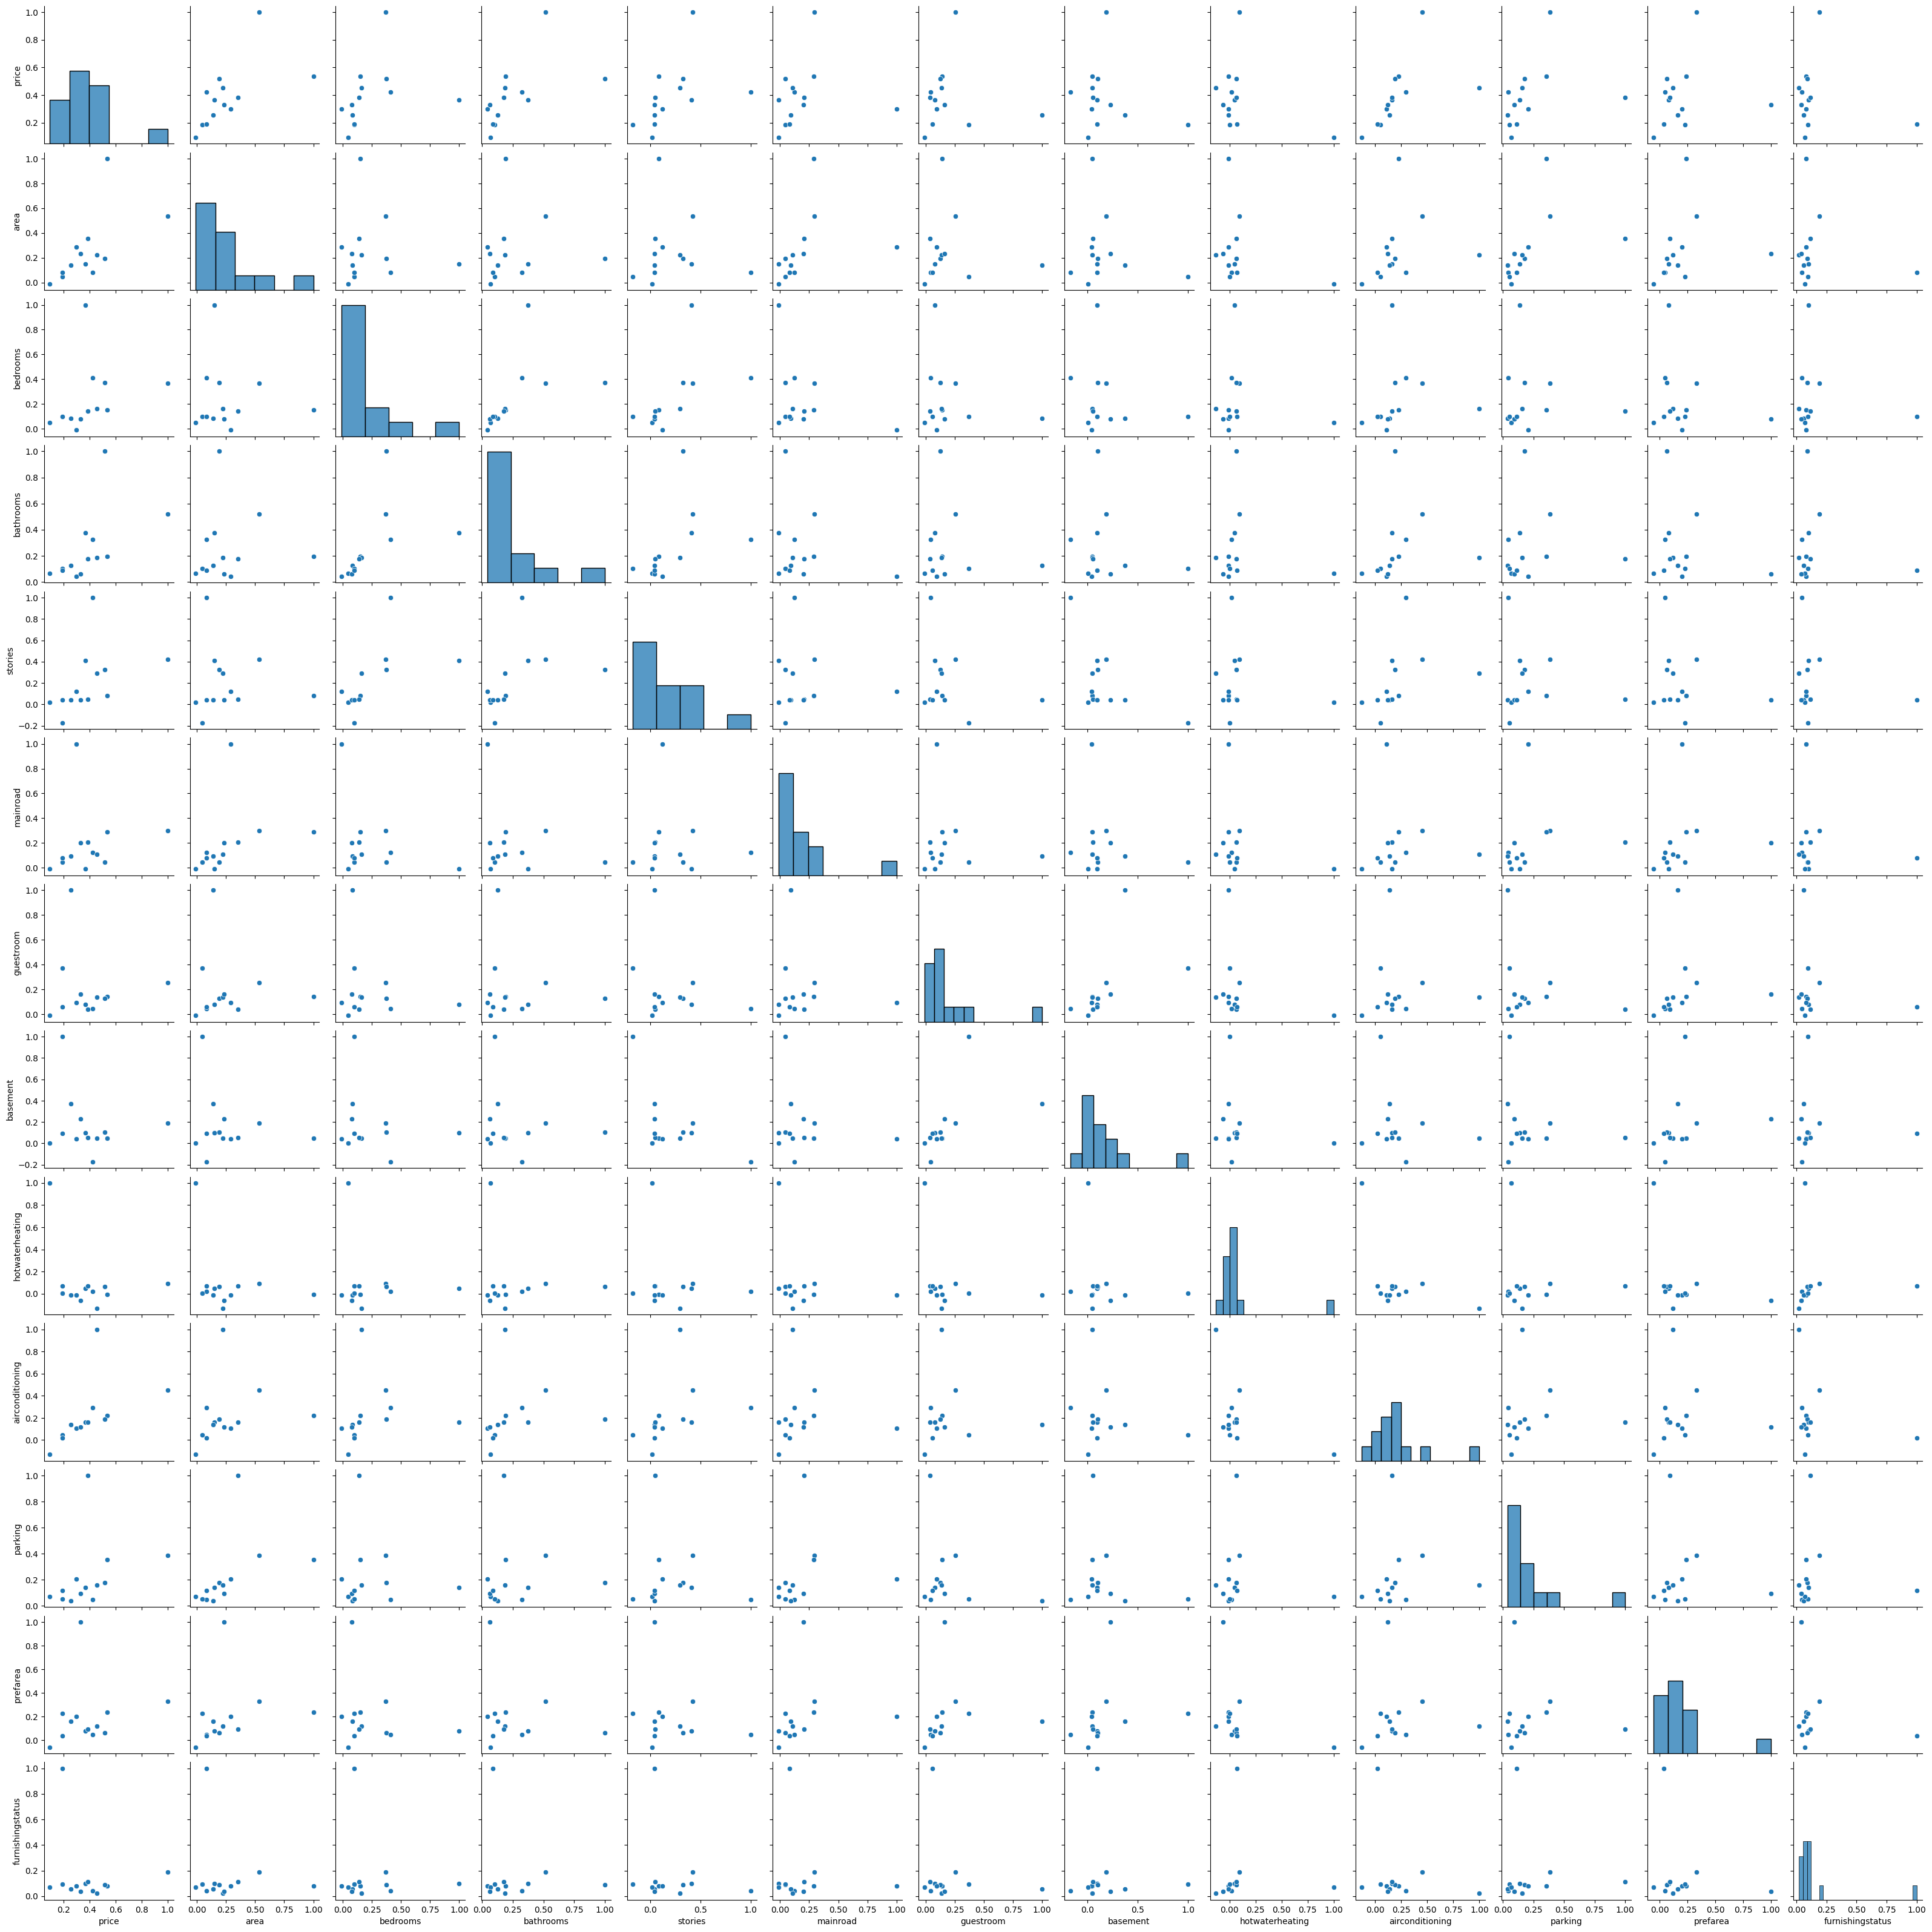

In [24]:
sns.pairplot(df.corr())

In [20]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop("price", axis = 1)
y = df["price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
prediction = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
mean_absolute_error(y_test, prediction)

899559.6606837743

In [38]:
mean_squared_error(y_test, prediction)

1540460031826.2065

In [39]:
r2_score(y_test, prediction)

0.6657167097112575

In [42]:
pred = pd.DataFrame({"y_test": y_test, "y_pred": prediction})

In [43]:
pred

,y_test,y_pred
316,4060000,5.324248e+06
77,6650000,7.038512e+06
360,3710000,3.112460e+06
90,6440000,4.613740e+06
493,2800000,3.067367e+06
...,...,...
172,5250000,7.113205e+06
124,5950000,6.280970e+06
388,3500000,3.295437e+06
521,2408000,2.411415e+06


Text(0.5, 1.0, 'Actual vs Predicted Prices')

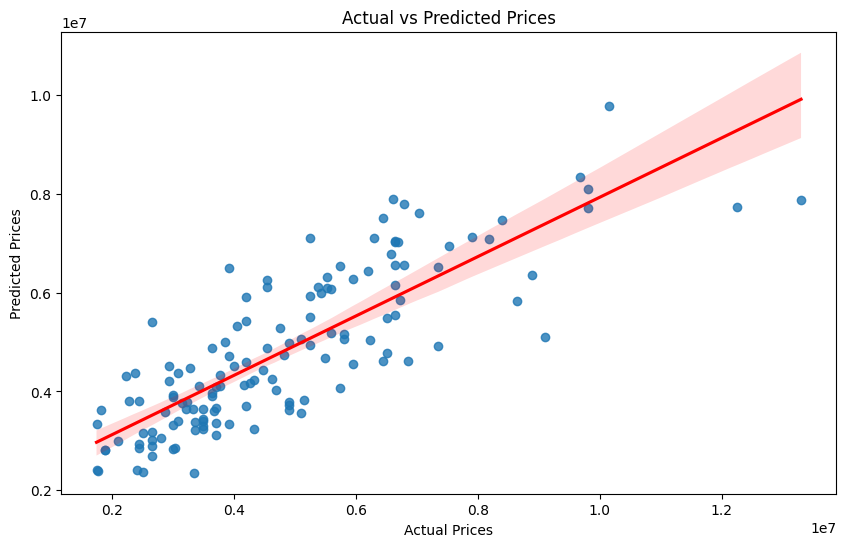

In [48]:
plt.figure(figsize = (10, 6))
sns.regplot(x=y_test, y=prediction, line_kws={"color":"red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

In [50]:
print(model.intercept_)

1860743.1850344832


In [51]:
print(model.coef_)

[3506992.30532705  361131.4376958  3375807.33429371 1202476.80599657
  407354.85757701  276900.5059115   428738.35258117  715159.20997782
  796838.50428126  802841.17190697  635168.73760055  196073.0881347 ]
